In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv("tripadvisor_hotel_reviews.csv.zip")

In [3]:
d.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
d.isnull().sum()

Review    0
Rating    0
dtype: int64

In [6]:
d.nunique()

Review    20491
Rating        5
dtype: int64

In [7]:
d["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

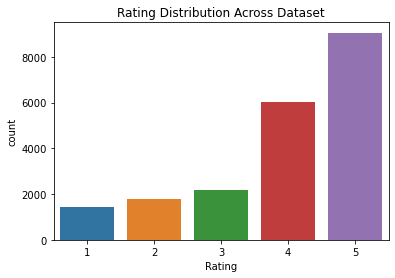

In [8]:
sns.countplot(data=d, x='Rating').set_title('Rating Distribution Across Dataset')

5    44.19
4    29.47
3    10.66
2     8.75
1     6.93
Name: Rating, dtype: float64


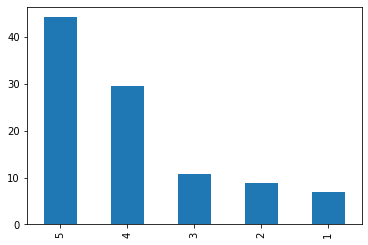

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
print(round(d.Rating.value_counts(normalize=True)*100,2))
round(d.Rating.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.show()

In [10]:
import re
import string

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text = re.sub('\w*\d\w*', '',text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [11]:
d['Cleaned_description'] = pd.DataFrame(d.Review.apply(cleaned1))
d.head(10)

,Review,Rating,Cleaned_description
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...
6,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mon...
7,"excellent staff, housekeeping quality hotel ch...",4,excellent staff housekeeping quality hotel cho...
8,"hotel stayed hotel monaco cruise, rooms genero...",5,hotel stayed hotel monaco cruise rooms generou...
9,excellent stayed hotel monaco past w/e delight...,5,excellent stayed hotel monaco past we delight ...


In [12]:
# Length of word in sentence
d['Length'] = d['Review'].apply(len)
d.head()

,Review,Rating,Cleaned_description,Length
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,593
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,1689
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...,1427
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,600
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,1281


In [13]:
# Total word in dataset before cleaning
length = d['Length'].sum()

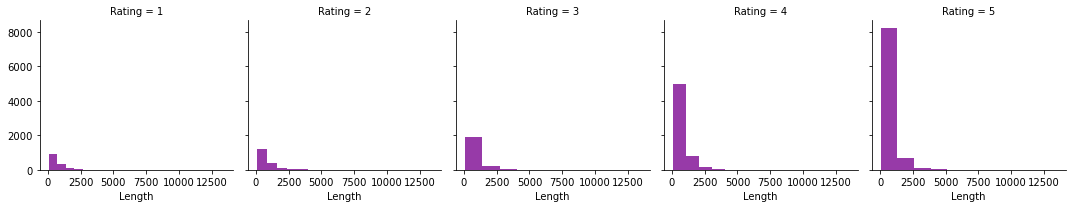

In [14]:
g = sns.FacetGrid(data=d, col='Rating')
g.map(plt.hist, 'Length', color='#973aa8')

In [15]:
d_neg = d.loc[d["Rating"] <= 3]
d_neg.reset_index(drop = True)

,Review,Rating,Cleaned_description,Length
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,1689
1,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...,1427
2,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...,333
3,nice hotel not nice staff hotel lovely staff q...,3,nice hotel not nice staff hotel lovely staff q...,417
4,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...,1411
...,...,...,...,...
5393,deceptive staff deceptive desk staff claiming ...,2,deceptive staff deceptive desk staff claiming ...,695
5394,not impressed unfriendly staff checked asked h...,2,not impressed unfriendly staff checked asked h...,616
5395,"ok just looks nice modern outside, desk staff ...",2,ok just looks nice modern outside desk staff n...,443
5396,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,5557


In [16]:
d_neg.shape

(5398, 4)

In [17]:
d_five = d.loc[d["Rating"] >= 4]
d_five = d_five.reset_index(drop = True)

In [18]:
d_five.shape

(15093, 4)

In [19]:
d_all = pd.concat([d_neg,d_five], axis=0)
d_all = d_all.reset_index(drop = True)

In [20]:
d_all.head()

,Review,Rating,Cleaned_description,Length
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,1689
1,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...,1427
2,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...,333
3,nice hotel not nice staff hotel lovely staff q...,3,nice hotel not nice staff hotel lovely staff q...,417
4,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...,1411


In [21]:
len(d_all)

20491

In [22]:
d_all["sentiment"] = np.where(d_all["Rating"] >=4,"Positive","Negative")

In [23]:
d_all.head()

,Review,Rating,Cleaned_description,Length,sentiment
0,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,1689,Negative
1,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...,1427,Negative
2,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...,333,Negative
3,nice hotel not nice staff hotel lovely staff q...,3,nice hotel not nice staff hotel lovely staff q...,417,Negative
4,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...,1411,Negative


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(d_all.Review,d_all.sentiment,test_size = 0.2,random_state = 2)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
v = CountVectorizer()

In [27]:
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

In [28]:
from sklearn import svm
clf_svm = svm.SVC(kernel="linear")
clf_svm.fit(x_train_vec,y_train)

SVC(kernel='linear')

In [29]:
clf_svm.score(x_test_vec,y_test)

0.8755794096121006

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test,clf_svm.predict(x_test_vec),average = None)

array([0.76011289, 0.91600791])

In [31]:
rev = ["there is no negative review"]
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Positive'], dtype=object)

In [32]:
import pickle
pickle_out = open('Classifier.pkl','wb')
pickle.dump(clf_svm, pickle_out)
pickle_out.close()

In [33]:
pic = pickle.load(open('Classifier.pkl', 'rb'))

In [34]:
pic.predict(v.transform(['the rooms are unclean']))

array(['Negative'], dtype=object)